# 날짜, 날씨, 휴일 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings(action='ignore')

In [8]:
dir_path = '/content/drive/MyDrive/2024-1 KUBIG 산업통상부/데이터/'

In [14]:
baseline = pd.read_csv(dir_path + 'baseline_final.csv')

In [21]:
# electricity에 전력 사용량 데이터 넣기. (ex 1호 가구의 전력사용량)
electricity = pd.read_excel(dir_path + '샘플데이터(전력사용량).xlsx')

In [23]:
# electricity data에서 24:00 > 익일 00:00로 수정하기
for i, time_str in enumerate(electricity['검침일']):
    if '24:00' in time_str:
        date_str = time_str.split(' ')[0]
        next_day = pd.to_datetime(date_str) + pd.Timedelta(days=1)
        electricity.loc[i, '검침일'] = next_day.strftime('%Y-%m-%d') + ' ' + '00:00'


baseline['일시'] = pd.to_datetime(baseline['일시'])
electricity['검침일'] = pd.to_datetime(electricity['검침일'])

In [24]:
electricity.rename(columns={'검침일': '일시', '순방향 유효전력량(KWH)':'유효전력량'}, inplace=True)
df = pd.merge(baseline, electricity, on='일시', how='left')

In [25]:
df

,일시,요일,휴일,기온,풍속,강수량,습도,year,month,day,hour,min,유효전력량,정전여부
0,2021-01-01 00:15:00,0,1,-7.200,0.600,0.0,58.0,2021,1,1,0,15,1.0400,정전미발생
1,2021-01-01 00:30:00,0,1,-7.200,0.600,0.0,58.0,2021,1,1,0,30,0.9595,정전미발생
2,2021-01-01 00:45:00,0,1,-7.200,0.600,0.0,58.0,2021,1,1,0,45,1.0504,정전미발생
3,2021-01-01 01:00:00,0,1,-7.200,0.600,0.0,58.0,2021,1,1,1,0,1.0706,정전미발생
4,2021-01-01 01:15:00,0,1,-7.300,0.625,0.0,58.0,2021,1,1,1,15,1.1128,정전미발생
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2023-12-31 23:00:00,3,0,-0.200,0.200,0.0,98.0,2023,12,31,23,0,1.1466,정전미발생
105116,2023-12-31 23:15:00,3,0,-0.275,0.200,0.0,98.0,2023,12,31,23,15,1.1224,정전미발생
105117,2023-12-31 23:30:00,3,0,-0.350,0.200,0.0,98.0,2023,12,31,23,30,1.1760,정전미발생
105118,2023-12-31 23:45:00,3,0,-0.425,0.200,0.0,98.0,2023,12,31,23,45,1.2954,정전미발생


# 데이터 전처리

## 유효전력량 결측치 처리

In [26]:
# 유효전력량 결측치 해당 row 출력
df[df['유효전력량'].isnull()]

,일시,요일,휴일,기온,풍속,강수량,습도,year,month,day,hour,min,유효전력량,정전여부
33345,2021-12-14 08:30:00,5,0,0.850,1.100,0.000,51.00,2021,12,14,8,30,NaN,NaN
33346,2021-12-14 08:45:00,5,0,0.975,1.150,0.000,51.00,2021,12,14,8,45,NaN,NaN
33347,2021-12-14 09:00:00,5,0,1.100,1.200,0.000,51.00,2021,12,14,9,0,NaN,NaN
33348,2021-12-14 09:15:00,5,0,1.225,1.275,0.000,50.50,2021,12,14,9,15,NaN,NaN
33349,2021-12-14 09:30:00,5,0,1.350,1.350,0.000,50.00,2021,12,14,9,30,NaN,NaN
33350,2021-12-14 09:45:00,5,0,1.475,1.425,0.000,49.50,2021,12,14,9,45,NaN,NaN
33351,2021-12-14 10:00:00,5,0,1.600,1.500,0.000,49.00,2021,12,14,10,0,NaN,NaN
33352,2021-12-14 10:15:00,5,0,2.000,1.600,0.000,48.75,2021,12,14,10,15,NaN,NaN
33353,2021-12-14 10:30:00,5,0,2.400,1.700,0.000,48.50,2021,12,14,10,30,NaN,NaN
33354,2021-12-14 10:45:00,5,0,2.800,1.800,0.000,48.25,2021,12,14,10,45,NaN,NaN


In [27]:
df = df.drop(df[df['유효전력량'].isnull()].index)

## Train-test data 구성

In [28]:
df = df.drop(columns = ['정전여부'])

In [30]:
df['일시'] = pd.to_datetime(df['일시'])

# start_date에 전력량 결측치 시작 지점, end_date에 전력량 결측치 끝 지점 정확히 입력해주시면 됩니다.
start_date = pd.Timestamp('2021-07-21 00:00:15')
end_date = pd.Timestamp('2021-07-22 23:45:00')

test_df = df[(df['일시'] >= start_date) & (df['일시'] <= end_date) == True ]
train_df = df[(df['일시'] >= start_date) & (df['일시'] <= end_date) == False]

test_df = test_df.drop(columns = ['일시'])
train_df = train_df.drop(columns = ['일시'])

In [31]:
X_train = train_df.drop(columns = ['유효전력량'])
y_train = train_df['유효전력량']
X_test = test_df.drop(columns = ['유효전력량'])
y_test = test_df['유효전력량']

# 모델링

In [35]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## Extra Trees Regressor

In [36]:
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [37]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

print('Extra Trees Regressor model rmse score:', rmse)
print('Extra Trees Regressor model r^2 score:', r2)

Extra Trees Regressor model rmse score: 2.6784069652345495
Extra Trees Regressor model r^2 score: 0.9400493660140813


Text(0, 0.5, 'Value')

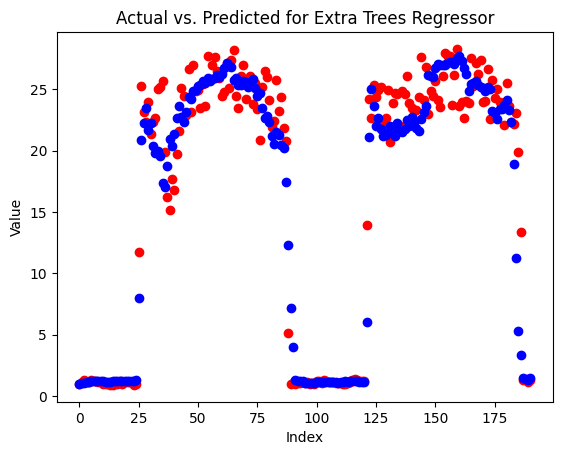

In [38]:
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual (y_test)')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted (y_pred)')

# 그래프 제목과 축 레이블 추가
plt.title('Actual vs. Predicted for Extra Trees Regressor')
plt.xlabel('Index')
plt.ylabel('Value')

## Feature Importance

In [41]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

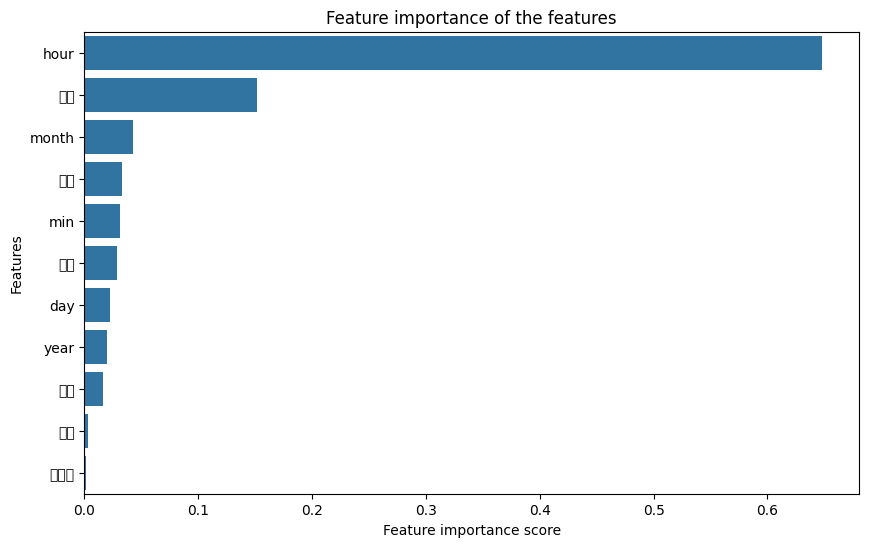

In [42]:
# view the feature scores
import seaborn as sns

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Feature importance of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()